In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn import tree

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,fbeta_score
from sklearn.metrics import log_loss
from sklearn import metrics

from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTENC

from IPython.display import Image  
from six import StringIO  
import graphviz
import pydot 

In [2]:
ccdata = pd.read_csv('BankChurners.csv') 
ccdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
#run once
ccdata.drop("CLIENTNUM",axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

ccdata['Gender'].replace({'M':1,'F':0},inplace=True)
ccdata["Attrition_Flag"].replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)

#run once
#drop_first = True to avoid structural multicollinearity
ccdata2 = pd.get_dummies(data=ccdata,columns=['Education_Level','Marital_Status',"Income_Category",'Card_Category'],drop_first=True)
ccdata2.columns

#data multicollinearity prevention
ccdata2.drop(['Avg_Open_To_Buy','Customer_Age','Total_Trans_Ct','Months_on_book','Total_Amt_Chng_Q4_Q1'],axis=1,inplace=True)

In [4]:
X = ccdata2.drop("Attrition_Flag",axis=1)
y = ccdata2['Attrition_Flag']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

## hyperparameter optimization

In [5]:
raw_dt = DecisionTreeClassifier()

In [7]:
from sklearn.model_selection import GridSearchCV

parameter_grid = [
    {
        'criterion':['gini','entropy'],
        'splitter': ['best'],
        'max_depth':np.arange(5,21,1),
        'min_samples_leaf':[20,25,30,35,40]
    }
]

clf = GridSearchCV(raw_dt, param_grid = parameter_grid, cv = 5, verbose=True, n_jobs = -1)

In [8]:
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [9]:
#rawresults
rawresults = pd.DataFrame(best_clf.cv_results_)

In [10]:
best_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20)

In [11]:
best_clf.best_score_

0.9197235264315143

## preliminary testing

In [5]:
from decisiontreemodule import decision_tree

decisiontreemodule.py is being imported into another module


In [6]:
dt1 = decision_tree(X_train,X_test,y_train,y_test)

In [7]:
dt1.KPI_summary()

accuracy score =  92.53 %
recall =  69.88 %
precision =  81.0 %
f2_score =  71.85 %
training accuracy =  93.96 %
testing accuracy =  92.53 %


                     Feature_names  Importances    cumsum
0                  Total_Trans_Amt     0.476372  0.476372
1              Total_Revolving_Bal     0.225610  0.701982
2              Total_Ct_Chng_Q4_Q1     0.124578  0.826560
3         Total_Relationship_Count     0.118453  0.945014
4                     Credit_Limit     0.024972  0.969986
5            Avg_Utilization_Ratio     0.011819  0.981805
6                  Dependent_count     0.006679  0.988484
7                           Gender     0.005117  0.993600
8            Contacts_Count_12_mon     0.003115  0.996716
9    Education_Level_Post-Graduate     0.002690  0.999406
10          Months_Inactive_12_mon     0.000594  1.000000
11          Card_Category_Platinum     0.000000  1.000000
12      Education_Level_Uneducated     0.000000  1.000000
13            Card_Category_Silver     0.000000  1.000000
14          Marital_Status_Married     0.000000  1.000000
15     Education_Level_High School     0.000000  1.000000
16        Educ

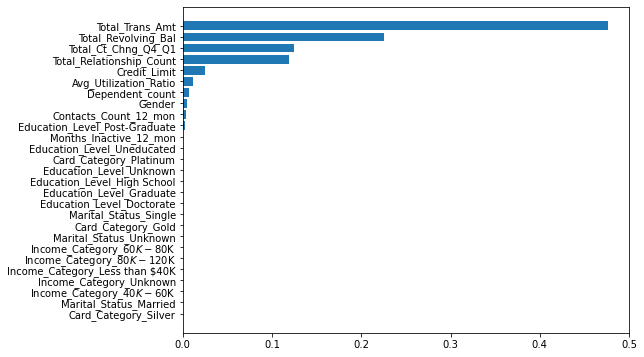

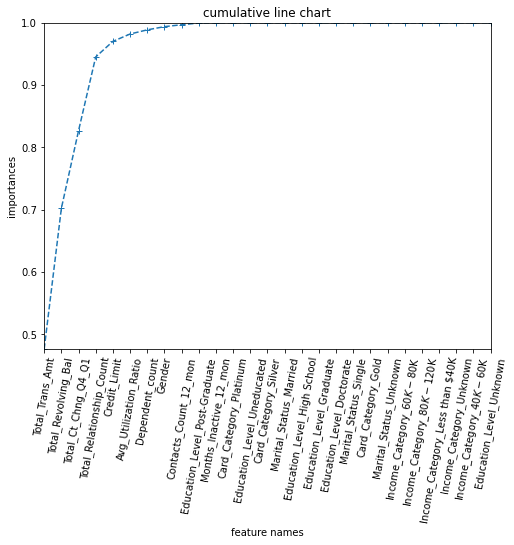

In [8]:
dt1.feature_importance()

In [9]:
#SMOTENC uses k-nearest neighbour algo to create synthetic samples 
#"Note - SMOTENC takes into consideration categorical and continuous variables"
from imblearn.over_sampling import SMOTE

#X= ccdata2.drop('Attrition_Flag',axis='columns')
#y= ccdata2['Attrition_Flag']
smote = SMOTE(sampling_strategy='minority') 
#samplingstrat specifies whether to use the minority or majority value for under/over-sampling
X_sm, y_sm = smote.fit_resample(X_train,y_train)

y_sm.value_counts()
#generate train test split first then do resampling only on training set

0    5949
1    5949
Name: Attrition_Flag, dtype: int64

In [10]:
##### With Pipeline Step resampling #####
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
X_train3, y_train3 = pipeline.fit_resample(X_train,y_train)
y_train3.value_counts()

0    3965
1    2379
Name: Attrition_Flag, dtype: int64

In [11]:
dt1 = decision_tree(X_train,X_test,y_train,y_test)
dt2 = decision_tree(X_sm,X_test,y_sm,y_test)
dt3 = decision_tree(X_train3,X_test,y_train3,y_test)

## post-feature selection

In [12]:
X_train2 = X_train.filter(['Total_Trans_Amt','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count','Credit_Limit','Avg_Utilization_Ratio','Dependent_count','Gender','Contacts_Count_12_mon','Education_Level_Post-Graduate','Months_Inactive_12_mon'],axis=1)
X_test2 = X_test.filter(['Total_Trans_Amt','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count','Credit_Limit','Avg_Utilization_Ratio','Dependent_count','Gender','Contacts_Count_12_mon','Education_Level_Post-Graduate','Months_Inactive_12_mon'],axis=1)
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 7403 to 8523
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total_Trans_Amt                3039 non-null   int64  
 1   Total_Revolving_Bal            3039 non-null   int64  
 2   Total_Ct_Chng_Q4_Q1            3039 non-null   float64
 3   Total_Relationship_Count       3039 non-null   int64  
 4   Credit_Limit                   3039 non-null   float64
 5   Avg_Utilization_Ratio          3039 non-null   float64
 6   Dependent_count                3039 non-null   int64  
 7   Gender                         3039 non-null   int64  
 8   Contacts_Count_12_mon          3039 non-null   int64  
 9   Education_Level_Post-Graduate  3039 non-null   uint8  
 10  Months_Inactive_12_mon         3039 non-null   int64  
dtypes: float64(3), int64(7), uint8(1)
memory usage: 264.1 KB


In [13]:
dt4 = (X_train2,X_test2,y_train,y_test)

In [14]:
#SMOTENC uses k-nearest neighbour algo to create synthetic samples 
#"Note - SMOTENC takes into consideration categorical and continuous variables"
from imblearn.over_sampling import SMOTE

#X= ccdata2.drop('Attrition_Flag',axis='columns')
#y= ccdata2['Attrition_Flag']
smote = SMOTE(sampling_strategy='minority') 
#samplingstrat specifies whether to use the minority or majority value for under/over-sampling
X_sm2, y_sm2 = smote.fit_resample(X_train2,y_train)

y_sm2.value_counts()
#generate train test split first then do resampling only on training set

##### With Pipeline Step resampling #####
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
X_train4, y_train4 = pipeline.fit_resample(X_train2,y_train)
y_train4.value_counts()

0    3965
1    2379
Name: Attrition_Flag, dtype: int64

In [15]:
dt1 = decision_tree(X_train,X_test,y_train,y_test)
dt2 = decision_tree(X_sm,X_test,y_sm,y_test)
dt3 = decision_tree(X_train3,X_test,y_train3,y_test)
dt4 = decision_tree(X_train2,X_test2,y_train,y_test)
dt5 = decision_tree(X_sm2,X_test2,y_sm2,y_test)
dt6 = decision_tree(X_train4,X_test2, y_train4,y_test)

ls1 = [dt1,dt2,dt3,dt4,dt5,dt6]

[print('dt{}: '.format(i+1),x.f2_score,'\n') for i,x in enumerate(ls1)]

dt1:  0.7184997892962495 

dt2:  0.7945154019534184 

dt3:  0.8140834575260804 

dt4:  0.7184997892962495 

dt5:  0.7674050632911393 

dt6:  0.7625444488344528 



[None, None, None, None, None, None]

## class weight rebalanced

In [16]:
from decisiontreemodule import decision_tree_rebalanced

In [17]:
dt7 = decision_tree_rebalanced(X_train,X_test,y_train,y_test)
dt8 = decision_tree_rebalanced(X_sm,X_test,y_sm,y_test)
dt9 = decision_tree_rebalanced(X_train3,X_test,y_train3,y_test)
dt10 = decision_tree_rebalanced(X_train2,X_test2,y_train,y_test)
dt11 = decision_tree_rebalanced(X_sm2,X_test2,y_sm2,y_test)
dt12 = decision_tree_rebalanced(X_train4,X_test2, y_train4,y_test)

In [18]:
ls2 = [dt7,dt8,dt9,dt10,dt11,dt12]

[print('dt{} :'.format(i+8),x.f2_score,'\n') for i,x in enumerate(ls2)]

dt8 : 0.8261682242990654 

dt9 : 0.7945154019534184 

dt10 : 0.7963302752293577 

dt11 : 0.8261682242990654 

dt12 : 0.7674050632911393 

dt13 : 0.7954964931709119 



[None, None, None, None, None, None]